In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("fraud.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [6]:
data.isna().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencod=LabelEncoder()
data['trans_date_trans_time']=labelencod.fit_transform(data['trans_date_trans_time'])
data['merchant']=labelencod.fit_transform(data['merchant'])
data['category']=labelencod.fit_transform(data['category'])
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
y=data.iloc[:,-1:]
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
1296670,0
1296671,0
1296672,0
1296673,0


In [9]:
x=data.iloc[:,1:5]
x

,trans_date_trans_time,cc_num,merchant,category
0,0,2703186189652095,514,8
1,1,630423337322,241,4
2,2,38859492057661,390,0
3,3,3534093764340240,360,2
4,4,375534208663984,297,9
...,...,...,...,...
1296670,1274786,30263540414123,499,0
1296671,1274787,6011149206456997,2,1
1296672,1274788,3514865930894695,599,1
1296673,1274789,2720012583106919,509,1


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print("Training Started.....\n")
print()
log_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=log_reg.predict(xtest)
print("predicted Total output\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]

Training completed....

Testing invoked
predicted Total output
 [0 0 0 ... 0 0 0]

 Testing is also completed....



In [12]:
ytrain


,is_fraud
619708,0
1099180,0
276164,0
303957,0
983466,0
...,...
1052491,0
556250,0
1085711,0
879066,0


In [13]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.9940617348217556

Confusion Matrix:
 [[257795      0]
 [  1540      0]]



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257795
           1       0.00      0.00      0.00      1540

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [17]:
x_resampled

,trans_date_trans_time,cc_num,merchant,category
0,0,2703186189652095,514,8
1,1,630423337322,241,4
2,2,38859492057661,390,0
3,3,3534093764340240,360,2
4,4,375534208663984,297,9
...,...,...,...,...
2578333,961223,180048185037117,85,2
2578334,1049007,2231186809828225,195,10
2578335,973701,4099707841315751,145,7
2578336,637267,346208242862904,400,11


In [18]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
2578333,1
2578334,1
2578335,1
2578336,1


In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [21]:
x_resampled

,trans_date_trans_time,cc_num,merchant,category
0,798680,676173792455,691,2
1,1082948,30518206766474,390,0
2,787171,4658490815480264,217,4
3,392965,4716561796955522,402,6
4,204629,3528407217576457,175,11
...,...,...,...,...
15007,1273532,3524574586339330,295,11
15008,1273624,3524574586339330,571,11
15009,1273665,4005676619255478,622,2
15010,1273795,3560725013359375,107,2


In [22]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
15007,1
15008,1
15009,1
15010,1


In [24]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [25]:
xtrain

,trans_date_trans_time,cc_num,merchant,category
2995,862279,376028110684021,667,7
13366,1004592,6011393492413821,533,4
1496,900047,2703186189652095,602,4
1047,496653,213180742685905,483,12
11630,678236,3559679414981506,423,13
...,...,...,...,...
5191,363082,30518206766474,543,4
13418,1009781,374930071163758,346,11
5390,1031463,581686439828,202,7
860,9534,38544312728630,690,5


In [26]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print("Training Started.....\n")
print()
log_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=log_reg.predict(xtest)
print("predicted Total output\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....


[LibLinear]

Training completed....

Testing invoked
predicted Total output
 [0 0 0 ... 0 0 0]

 Testing is also completed....



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.5018315018315018

Confusion Matrix:
 [[1507    0]
 [1496    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1507
           1       0.00      0.00      0.00      1496

    accuracy                           0.50      3003
   macro avg       0.25      0.50      0.33      3003
weighted avg       0.25      0.50      0.34      3003



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_resampled["is_fraud"].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

In [29]:
log_reg.classes_

array([0, 1], dtype=int64)

In [30]:
log_reg.coef_

array([[-2.14303419e-32, -1.09845761e-20, -4.55755249e-37,
         1.09791418e-36]])

In [31]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [32]:
log_reg.dual

False

In [33]:
log_reg.feature_names_in_

array(['trans_date_trans_time', 'cc_num', 'merchant', 'category'],
      dtype=object)

In [34]:
log_reg.fit_intercept

True

In [35]:
log_reg.intercept_

array([4.3675334e-39])

In [37]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [44]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.49999897, 0.49998688, 0.48767709, ..., 0.4999902 , 0.49999897,
       0.49999022])

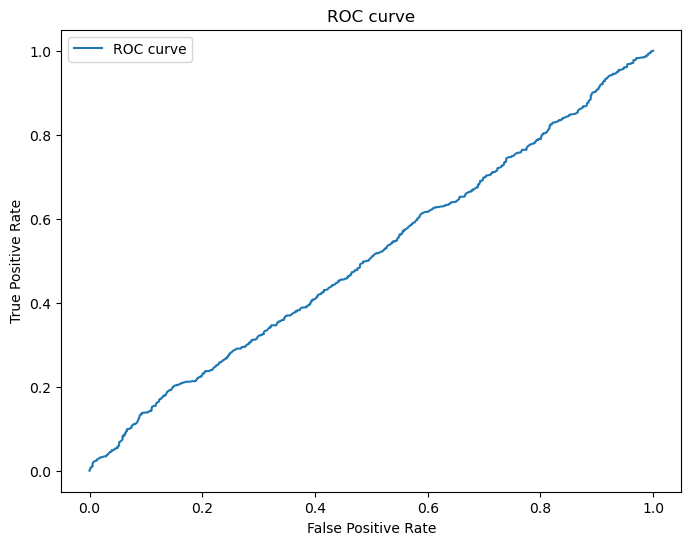

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

In [46]:
roc_curve

0.511943151212346